<a href="https://www.kaggle.com/code/tabidzukare/understanding-the-mnist-dataset?scriptVersionId=167356710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

I created this notebook to explore the MNIST dataset in preparation for working with it in programming Neural Networks.  It seemed complicated at first, but as I stepped through the process below, I was able to get a better understanding of its structure and how that related to use in programming ANN's.  I hope it helps you too!  I'm not sure how anyone can give feedback, but if you find a way and have something to add or modify feel free to let me know or re-produce your own copy.

### Modules

In [1]:
# Core operations
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Modelling - platform
import tensorflow as tf
from tensorflow import keras

2024-03-16 20:23:28.508359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 20:23:28.508521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 20:23:28.691305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Data - Loading

In [2]:
# Download the MNIST data set
data = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Data architecture
**Top level - `data`**
- Top level is a tuple with a length of **2**
- These tuples represent *'Training'* and *'Testing'* sets of data

In [3]:
print(type(data))
print(len(data))

<class 'tuple'>
2


**Training/Testing set structure - `data[x]`/`data[y]`**
- These sets are also tuples, with a length of **2**
- These tuples represent a collection of *Images* and *Image keys*

In [4]:
# Implied set of training data
print("TRAINING DATA")
print(type(data[0]))
print(len(data[0]))

print()

# Implied set of testing data
print("TESTING DATA")
print(type(data[1]))
print(len(data[1]))

TRAINING DATA
<class 'tuple'>
2

TESTING DATA
<class 'tuple'>
2


*NOTE: Moving forward make sure to pay attention to the representative values in each header, otherwise you may get turned around!*

**Image collection structure - `data[x][x]`**
- The collection of images are stored in an np.ndarray with a length of **60000**
- This means that for what we could interpret as a Training set of data, there are 60000 images to work with

In [5]:
# data[x][x] - aka 'Training'
print(type(data[0][0]))
print(len(data[0][0]))

<class 'numpy.ndarray'>
60000


In [6]:
# data[y][x] - aka 'Testing'
print(type(data[1][0]))
print(len(data[1][0]))

<class 'numpy.ndarray'>
10000


*See what I mean!  I think you've got it now... well... I hope you've got it now!*

**Image structure - `data[x][x][x]`**
- An image here is represented as an np.ndarray with a length of 28
- The values of this array represent rows of pixels

In [7]:
print(type(data[0][0][0]))
print(len(data[0][0][0]))

<class 'numpy.ndarray'>
28


**Row of pixels - `data[x][x][x][x]`**
- Each row of pixels at this level is an np.ndarray with a length of 28
- The values of this array are np.unint8's with a range of 0-255

In [8]:
print(type(data[0][0][0][0]))
print(len(data[0][0][0][0]))
print(f'Range: {np.min(data[0][0][0][0])} - {np.max(data[0][0][0][0])}')

<class 'numpy.ndarray'>
28
Range: 0 - 0


*Wait what?  Why is the Range 0-0?  - Its because in this row this is all we see, but if we zoom out to the **image** level, now look at the adjusted range*

In [9]:
# One level up at the whole image level
print(type(data[0][0][0]))
print(len(data[0][0][0]))
print(f'Range: {np.min(data[0][0][0])} - {np.max(data[0][0][0])}')

<class 'numpy.ndarray'>
28
Range: 0 - 255


**A picture is worth 1000 words, or is it 28?**
- Now that we're down to the individual pixel level, we can get creative with plotting, and map a grayscale color palette to each value in the 'row' of pixels and see what it looks like

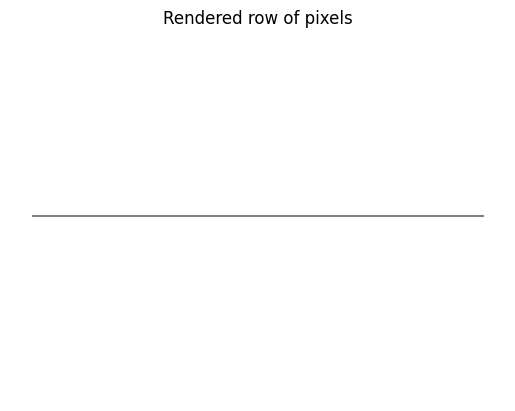

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()
ax.axis('off')

# Plot the array with a colormap
ax.plot(data[0][0][0][0], color='gray')

# Add labels and title
ax.set_title('Rendered row of pixels')

# Show the plot
plt.show()

**Putting the image together**
- If we have an array of *rows of pixels* - `data[x][x][x]` that is 28 in length, we could say: *the height of the image is 28 pixels*
- If each row `data[x][x][x][x]` within that array is also a length of 28, we could say: *the width of the image is 28 pixels*
- Now if we put it together - each entry at the `data[x][x][x]` level is a 28x28 pixel image!

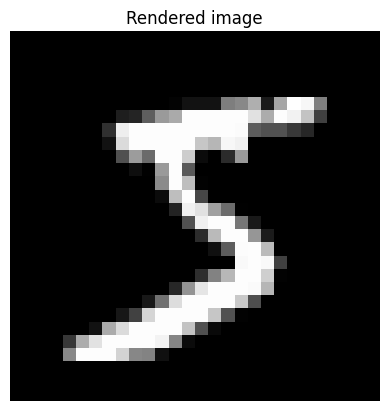

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()
ax.axis('off')

# Display the array with a colormap
image = ax.imshow(data[0][0][0], cmap='gray')

# Add labels and title
ax.set_title('Rendered image')

# Show the plot
plt.show()

**What do the pictures represent?**
- In order for us to determine whether our algorithm can identify what an image is we have to have some basis for *what* the image being modelled against represents.
- When we have an image at `data[x][x][x]`, the key at `data[x][y][x]` tells us what that image is supposed to be

In [12]:
# Want to know WHAT it's an image of?  Look at the corresponding key
data[0][1][0]

5

**Image key collection structure `data[x][y]`**
- The collection of image keys are stored in an np.ndarray with an equivalent length of **60000**
- Each key is represented by an np.unint8 in a range of 0-9
- Is intended to represent what the corresponding image depicts (a handwritten character with a value of 0-9)

In [13]:
# data[x][y] - aka 'Training'
print(type(data[0][1]))
print(len(data[0][1]))
print(f'Range: {np.min(data[0][1])} - {np.max(data[0][1])}')

<class 'numpy.ndarray'>
60000
Range: 0 - 9


In [14]:
# data[y][x] - aka 'Testing'
print(type(data[1][1]))
print(len(data[1][1]))
print(f'Range: {np.min(data[1][1])} - {np.max(data[1][1])}')

<class 'numpy.ndarray'>
10000
Range: 0 - 9


*Very* cool!

### Data preparation

- For us to work with the data from a modelling perspective, we need to break it up between these implied training and testing sets.  
- To do so we need to leverage a technique called 'unpacking' which is a basic Python operation on tuples we can perform or [read about separately](https://www.w3schools.com/python/python_tuples_unpack.asp).

In [15]:
# Unpack the MNIST data
(X_temp, y_temp), (X_test, y_test) = data

- The top level terms (in paranthesis), separated by the comma, will hold the 60k/10k blocks of images and keys respectively
- For the inner terms, the 'X' values, will hold the images, and the 'y' values will hold the image keys

In [16]:
# Training set of data
print("TRAINING DATA")
print(X_temp.shape) # 60k images, which are 28 rows of 28 pixels, each pixel is represented as an integer ranging from 0-255
print(y_temp.shape) # 60k keys, which are integers ranging from 0-9

print()

# Testing set of data
print("TESTING DATA")
print(X_test.shape)
print(y_test.shape)

TRAINING DATA
(60000, 28, 28)
(60000,)

TESTING DATA
(10000, 28, 28)
(10000,)


## Conclusion

I hope this brief introduction into the MNIST dataset and how to prepare it for use in modelling was of use to you!